# Project 2025 - VideoGamesSales


## Objective

 - The main goal of this project is to perform exploratory data analysis (EDA) on historical video game sales to uncover key patterns and trends that can help publishers increase global sales by 10–15% through data-driven decisions.

## Business Questions

- What are the most popular genres, platforms, and publishers globally and by region?

- How has the video game market evolved over time?

- What are the regional differences in player preferences?

- Which strategies can publishers and developers apply to boost sales?

## Project Work-Plan:

<div style="border: 2px solid #333; padding: 15px; border-radius: 10px;">
    
**1. Collecting and loading data:**

- Loading the 'data.csv' dataset.

- Cleaning the dataset from unnecessary data

- Defining the data structure and variable types.

**2. Processing data for further analysis:**

- Checking data for missing values/incorrect , and remove them
  
- Transform datatype

**3. Data analysis**

1. Analysis of sales in regions

- Finding the largest sales in regions

- Finding the overall sales in regions

2. Analysis of the most profitable genres and platforms in dataset

- Finding the top-seller genre

- Finding the top-seller platform in dataset


**4. Visualization**

- `Line Plot`: Game Sales trends by year + conclusions

- `Histogram`: Sales distribution by games + conclusions

- `Horizontal bar chart`: The Most profitable platforms + conclusions

- `Bar chart`: The Most popular genres + conclusions

- `Bar chart`: Top-10 Publishers + conclusions

- `Horizontal bar chart`: Genres distribution by Publishers + conclusion

- `Heatmap` : Global videogames sales(in millions) by genres and platform , diagram analysis and recommendations

- `Lineplot` : Sales dynamics after 2010 , made with the purpose of tracking the decline in game sales after 2010, for a bigger picture , as well as recommendations

- `Lineplot with Legend` : Genre Trends by Year, 

5. **Final Insights & Recommendations:**

- General Trends: Genres, platforms, and regional preferences.

- Market Behavior: Patterns by year, platform lifecycle, and consumer shifts.

- Actionable Advice: Strategies for developers, publishers, and investors to optimize sales and market share.

</div>

---

In [1]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#Data import
df = pd.read_csv("data.csv")
df = df.drop(['Rank'] , axis = 1) #Removing 1 unnecessary column

In [3]:
df.head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  object 
 1   Platform      16598 non-null  object 
 2   Year          16327 non-null  float64
 3   Genre         16598 non-null  object 
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.3+ MB


In [5]:
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


# Column analysis based on Descriptive Statistics:
- `Year`: The Year column contains 16327 records, while the other columns contain 16598, which may indicate that in 271 cases there is no information about the year of manufacture, need to check the Column for missing values, and fill in/delete
  
- `NA_Sales`: Check the column for abnormal outliers, as well as check the distribution of sales and determine which games made the main cash

  
- `EU_Sales`: Need to compare the column with NA_Sales what genres or platforms are more popular in Europe. Are there any zero values that should be processed

  
- `JP_Sales`: Need to see which platforms are dominant and whether there are any strong differences between regions

  
- `Other_Sales`: It is necessary to determine which regions are included in this column, and also to study the dependence on global sales

  
- `Global_Sales`: Check the correlation with regional sales. Find out which games sell well everywhere, and which are popular only in certain regions

In [6]:
df.dtypes

Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

# Analysis of Column Type
- `Column Name` : Name of the Game(-s) , "object" type so correct. Need to check for duplicates
  
- `Platform` : Name of Platform where the games were released, "object" type , correct as well.

   
- `Year` : Year when games were published , type is "float64" which incorrect, year can't be float values, needed to be convert into integer values.

  
- `Genre`: Genre of Games(Platform,Sports,Racing,etc.) , "object" type correct.

  
- `Publisher`: Publisher of the game , "object" type correct.

  
- `NA_Sales`: Sales in NA regiom , "float64" correct

  
- `EU_Sales`: Sales in EU , "float64" dtype is valid

  
- `JP_Sales`: Sales in Japan , "float64" valid

  
- `Other_Sales`: Sales in other regions , "float64" is valid as for other regions

  
- `Global_Sales`: Worldwide sales , "fload64" is correct

In [7]:
df.isnull().sum() # Checking for missing values

Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [8]:
missing_values = df.loc[df['Year'].isna(), ['Name' , 'Platform' , 'Year']] # Missing values at Year column
print(missing_values)

                              Name Platform  Year
179                Madden NFL 2004      PS2   NaN
377               FIFA Soccer 2004      PS2   NaN
431     LEGO Batman: The Videogame      Wii   NaN
470     wwe Smackdown vs. Raw 2006      PS2   NaN
607                 Space Invaders     2600   NaN
...                            ...      ...   ...
16307                Freaky Flyers       GC   NaN
16327                    Inversion       PC   NaN
16366  Hakuouki: Shinsengumi Kitan      PS3   NaN
16427                 Virtua Quest       GC   NaN
16493                   The Smurfs      3DS   NaN

[271 rows x 3 columns]


In [9]:
duplicates = df.loc[df.duplicated(subset = ['Name' , 'Platform'] , keep=False), ['Name', 'Platform' , 'Year']]
print(duplicates)
print(len(duplicates))
# df.drop([4145 , 14999 , 603 , 11676, 1173] , inplace = True) Removing duplicates 
print(df.index.isin([4145, 14999, 603, 11676]))

                              Name Platform    Year
603                  Madden NFL 13      PS3  2012.0
1173   Need for Speed: Most Wanted     X360  2012.0
1530   Need for Speed: Most Wanted     X360  2005.0
1715            Sonic the Hedgehog      PS3  2006.0
4145            Sonic the Hedgehog      PS3     NaN
5900   Need for Speed: Most Wanted       PC  2005.0
11676  Need for Speed: Most Wanted       PC  2012.0
14997  Wii de Asobu: Metroid Prime      Wii     NaN
14999  Wii de Asobu: Metroid Prime      Wii     NaN
16127                Madden NFL 13      PS3  2012.0
10
[False False False ... False False False]


In [10]:
#Turning Year column into Integer
df['Year'] = pd.to_numeric(df['Year'], errors='coerce').astype('Int64')
df.dropna(subset=['Year'] , inplace=True) # Removing N/A from Year column
df.isnull().sum() 

Name             0
Platform         0
Year             0
Genre            0
Publisher       36
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

In [11]:
df.dropna(subset=['Publisher'] , inplace = True) # Removing missing values from Publisher column
df['Publisher'].isnull().sum() 

np.int64(0)

In [12]:
#Checking for outliers in Year column
print(df[(df['Year'] < 1980) | (df['Year'] > 2020)])

Empty DataFrame
Columns: [Name, Platform, Year, Genre, Publisher, NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales]
Index: []


In [13]:
df[['NA_Sales' , 'EU_Sales' , 'JP_Sales' , 'Other_Sales' , 'Global_Sales']].isin([0]).sum() #Checking for zeroes Sales in every region(not N/A values)

NA_Sales         4430
EU_Sales         5624
JP_Sales        10207
Other_Sales      6336
Global_Sales        0
dtype: int64

In [14]:
df[['NA_Sales' , 'EU_Sales' , 'JP_Sales' , 'Other_Sales' ]].replace(0,np.nan) #Replacing zeroes to N/A values 
df = df.dropna(subset=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']) #Removing new N/A values
df.isnull().sum()

Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

# Conclusion on what was done:
1. **N/A values:**
   - The dataset had only two columns with missing values.
     
   - The date type in the Year column was changed to int64 from float64 using `pd.to_numeric()` . And then removed using `dropna()`.
  
     
   - For the Publisher column missing values were removed the same.
  
     
2.  **Data Type Handling:**

   - The `Year` column were converted to Integer(In64) from a Float value using `pd.to_numeric()` and `.astype('Int64')`

3.   **Working with zero values in Dataset:**
   - I found out that dataset contain zero values especially in Sales columns(except `Global`) which could indicate an mistake , therefore, zero values were replaced using `.replace(0,np.nan)` with N/A and then removed from the dataset `dropna()`

In [15]:
print(df[['NA_Sales' , 'EU_Sales' , 'JP_Sales' , 'Other_Sales' ]].describe()) 

           NA_Sales      EU_Sales      JP_Sales   Other_Sales
count  16291.000000  16291.000000  16291.000000  16291.000000
mean       0.265647      0.147731      0.078833      0.048426
std        0.822432      0.509303      0.311879      0.190083
min        0.000000      0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000      0.000000
50%        0.080000      0.020000      0.000000      0.010000
75%        0.240000      0.110000      0.040000      0.040000
max       41.490000     29.020000     10.220000     10.570000


In [16]:
print(df[['NA_Sales' , 'EU_Sales' , 'JP_Sales' , 'Other_Sales' , 'Global_Sales']].sum())

NA_Sales        4327.65
EU_Sales        2406.69
JP_Sales        1284.27
Other_Sales      788.91
Global_Sales    8811.97
dtype: float64


In [17]:
df_map = pd.DataFrame({
    'Region': ['North America', 'Europe', 'Japan', 'Other'],
    'Sales': [41.49, 29.02, 10.22, 10.57],
    'Latitude': [54.5, 54.5, 36.2, -8.8],
    'Longitude': [-105, 15, 138.2, 115.1]
})
#Creating a new dataset for Map Diagram(in Tableau that will show the Maximum Sales for each region
df_map.to_csv('region_sales.csv' , index = False)
#Saving new dataframe as csv-file

**Where:**

1. `Region` - Column with regions which will be on the map
   
3. `Sales` - Max Sales for each region which we already found

   
5. `Latitude` - Latitude of the region on the map

   
7. `Longtitude` - Longtitude of the region on the map

# Analysis of sales in regions
- The leader in sales is North America (`NA_Sales`), having the largest sales of the regions `41.49`. In second place is the European region (`EU_Sales`) having a maximum of 29.02 sales. Then come the Other regions (Other_Sales) with `10.57` sales. The last is Japan(`JP_Sales`) with `10.22`.

  
- In terms of overall sales, North America (`NA_Sales`) is again in the lead with `4327.65` sales.  Then comes Europe (`EU_Sales`) with sales of `2406.69`. After the European region, which is strange, comes Japan (`JP_Sales`) with sales of `1284.27`. And after that, the other regions (`Other_Sales`) with total sales of `788.91`

In [18]:
top10_games = df.nlargest(10,'Global_Sales')[['Name','Genre','Global_Sales']]
print(top10_games) #Defining top10 most selling games in dataset

                        Name         Genre  Global_Sales
0                 Wii Sports        Sports         82.74
1          Super Mario Bros.      Platform         40.24
2             Mario Kart Wii        Racing         35.82
3          Wii Sports Resort        Sports         33.00
4   Pokemon Red/Pokemon Blue  Role-Playing         31.37
5                     Tetris        Puzzle         30.26
6      New Super Mario Bros.      Platform         30.01
7                   Wii Play          Misc         29.02
8  New Super Mario Bros. Wii      Platform         28.62
9                  Duck Hunt       Shooter         28.31


In [19]:
genre_sales = df.groupby('Genre')['Global_Sales'].sum().reset_index()
genres_sales = df.sort_values(by='Global_Sales' , ascending = False)[['Name','Genre','Global_Sales']]
print(genres_sales.head(10))

                        Name         Genre  Global_Sales
0                 Wii Sports        Sports         82.74
1          Super Mario Bros.      Platform         40.24
2             Mario Kart Wii        Racing         35.82
3          Wii Sports Resort        Sports         33.00
4   Pokemon Red/Pokemon Blue  Role-Playing         31.37
5                     Tetris        Puzzle         30.26
6      New Super Mario Bros.      Platform         30.01
7                   Wii Play          Misc         29.02
8  New Super Mario Bros. Wii      Platform         28.62
9                  Duck Hunt       Shooter         28.31


In [20]:
platform_sales = df.groupby('Platform')['Global_Sales'].sum().reset_index()
platform_sales = df.sort_values(by='Global_Sales' , ascending = False)[['Name','Platform','Global_Sales']]
print(platform_sales.head(10))

                        Name Platform  Global_Sales
0                 Wii Sports      Wii         82.74
1          Super Mario Bros.      NES         40.24
2             Mario Kart Wii      Wii         35.82
3          Wii Sports Resort      Wii         33.00
4   Pokemon Red/Pokemon Blue       GB         31.37
5                     Tetris       GB         30.26
6      New Super Mario Bros.       DS         30.01
7                   Wii Play      Wii         29.02
8  New Super Mario Bros. Wii      Wii         28.62
9                  Duck Hunt      NES         28.31


# Analysis of the most profitable genres and platforms
- Using `groupby()` , the data was grouped by the `Platform/Genres` column.
- Then the total sales for those platforms were summed using `['Global_Sales'].sum()`
- After `reset_index` was used to make the output look like a DataFrame and display the column name instead of the index.

### Output analysis:
- The top selling genre is sports with total sales of `82.74` . The top selling platform is Wii with sales of `82.74`

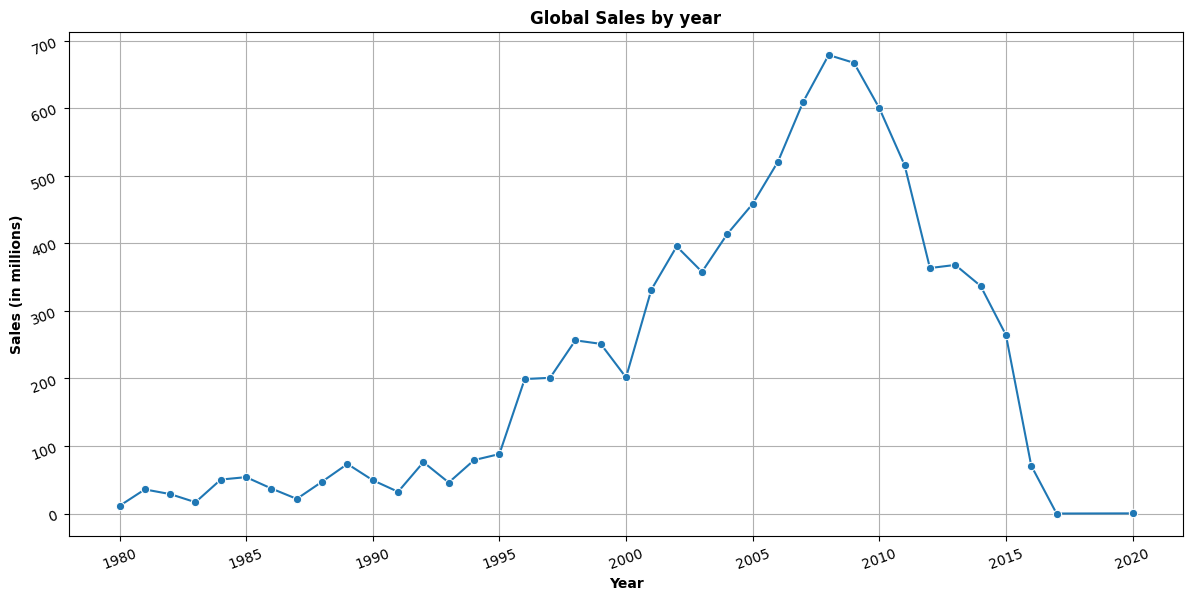

In [21]:
sales_by_year = df.groupby('Year')['Global_Sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_by_year, x='Year', y='Global_Sales', marker='o')
plt.title('Global Sales by year' , weight = 'bold')
plt.xlabel('Year' , weight = 'bold')
plt.ylabel('Sales (in millions)', weight = 'bold') 
plt.grid()
plt.tight_layout()
plt.xticks(rotation=20)
plt.yticks(rotation = 20)
plt.show()

# Diagram output
**1. Growth and sales peak**

- Sales of video games have been growing since the 1980s, actively 2000 - 2008

- This may be due to the popularity of consoles such as the `PlayStation 2` , `Xbox 360` , and `Nintendo Wii` .

**2. Decrease after 2010**

- Sales have been gradually declining since 2010.

- Possible reasons may include the transition to digital distribution (Steam, PlayStation Store, Xbox Live), and the decline in popularity of physical copies.

**3. Trendline**
   
- Throughout the chart, the trend line remains horizontal almost always, which may indicate low selling.

**4. Data Scatter**
   
- The diagram shows that there are individual hits that have exceeded 20 million sales.

- This confirms the rule that the gaming industry depends on blockbusters (GTA, etc.)

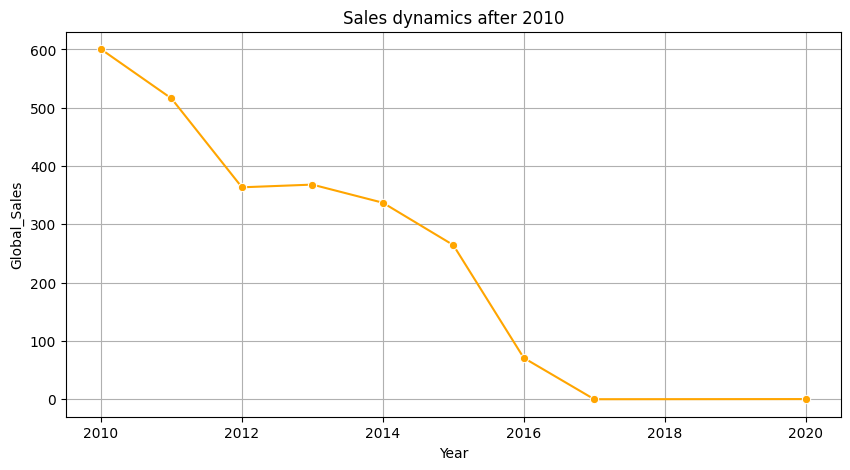

In [22]:
recent_years = sales_by_year[sales_by_year['Year'] >=2010]
plt.figure(figsize=(10, 5))
sns.lineplot(data=recent_years, x='Year', y='Global_Sales', marker='o', color='orange')
plt.title('Sales dynamics after 2010')
plt.grid()
plt.show()

# Diagram output
1. **A sharp decline in sales after 2010:**
 - From ~600 million copies in 2010 to almost zero by 2017–2020.
 - The main reason is the transition to digital distribution and the growth of mobile games (App Store, Google Play).
 - Physical media no longer dominate, which means that forecasts for physical copies are negative for publishers.

2. **Recommendation for business:**
- Publishers should focus on digital platforms and live-service models rather than physical sales.



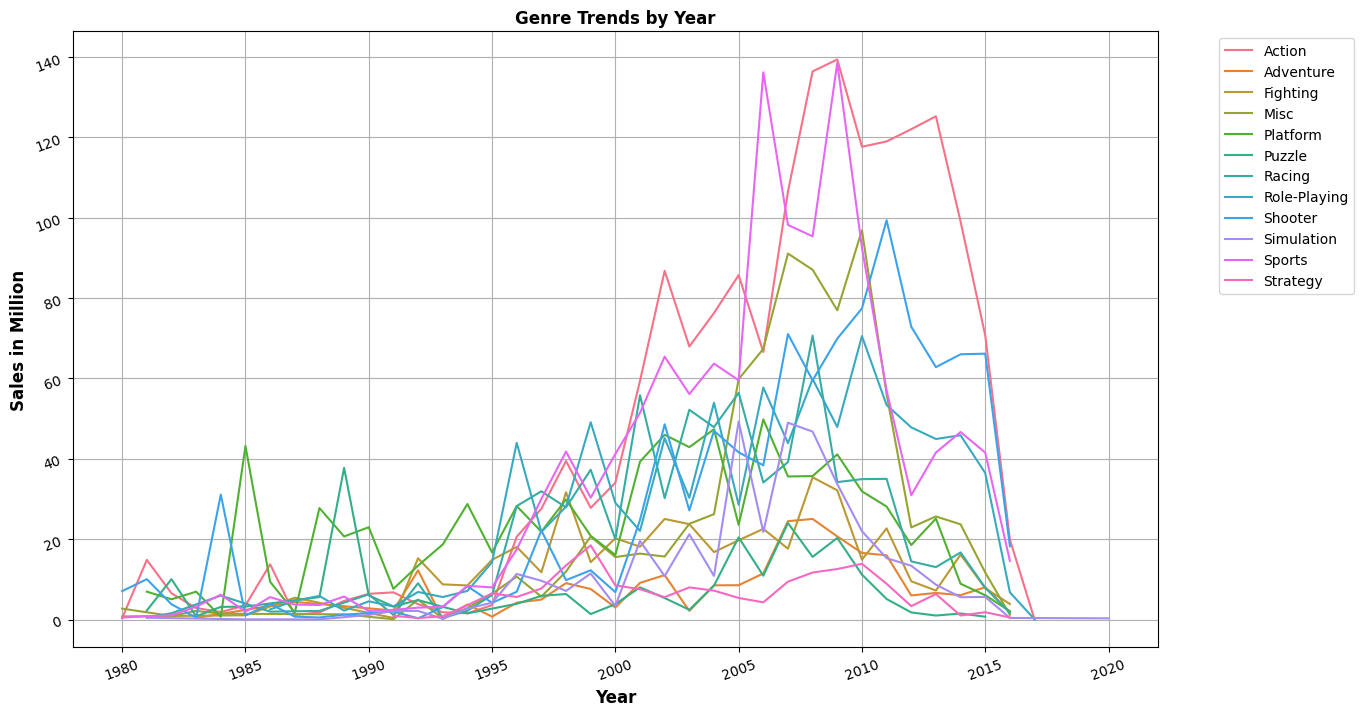

In [23]:
genre_trend = df.groupby(['Genre' , 'Year'])['Global_Sales'].sum().reset_index()
plt.figure(figsize=(14, 8))
sns.lineplot(data=genre_trend, x='Year', y='Global_Sales', hue='Genre')
plt.title('Genre Trends by Year' , weight='bold' , fontsize = 12)
plt.xlabel('Year' , weight='bold' , fontsize = 12)
plt.ylabel('Sales in Million' , weight='bold' , fontsize = 12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.xticks(rotation=20)
plt.yticks(rotation = 20)
plt.show()

# Diagram output

1. **Trend analysis**:
- Most genres peaked between 2005 and 2010 (Action, Sports, Shooter, RPG).

- After 2010, all genres went into decline, but Sports and Action (the main mass genres) were hit the hardest.

- The Role-Playing (RPG) genre held its position better until 2015, thanks to strong Japanese studios (JRPG).

- Adventure, Puzzle, and Strategy initially had a low share and had almost disappeared by 2020.


2. **Recommendation for businesses:**

- Action and shooter games remain key, but the trend is shifting toward online games (battle royale, MOBA).

- For the Japanese market, RPGs are still promising.

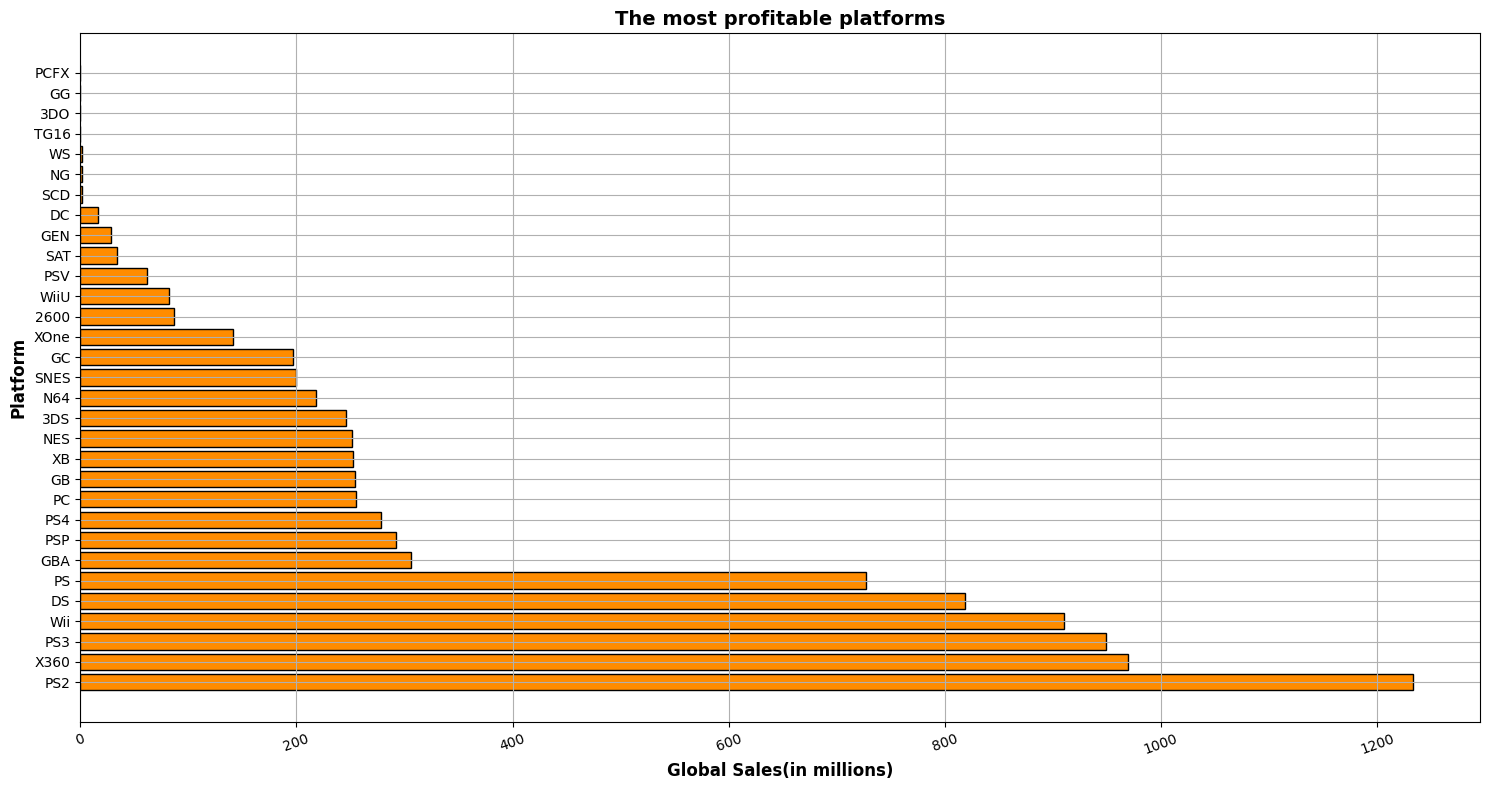

In [24]:

platform_sales_plot = platform_sales.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(15,8))
plt.barh(platform_sales_plot.index , platform_sales_plot.values , edgecolor = 'black' , color = 'darkorange')
plt.xlabel('Global Sales(in millions)' , fontsize = 12 , fontweight = 'bold')
plt.ylabel('Platform' , fontsize = 12 , fontweight = 'bold')
plt.title('The most profitable platforms' , fontsize = 14 , fontweight = 'bold')
plt.xticks(rotation=20)
plt.tight_layout()
plt.grid()
plt.show()

# Diagram output:
**1. Quick review**

- The bar chart show the most profitable platforms in dataset by global sales.

**2. Key conclusions**

- Market Leaders: `PS2` , `X360` , `PS3`  and `Wii` are the most profitable platforms, each exceeding 800 million units sold.

- Console Dominance: The top is dominated by consoles rather than PC , which means dominance of console gaming in the industry

- Gradual Decline: After top-5 there is sharp drop which means that there exist large success difference between the leaders and less popular platforms

  

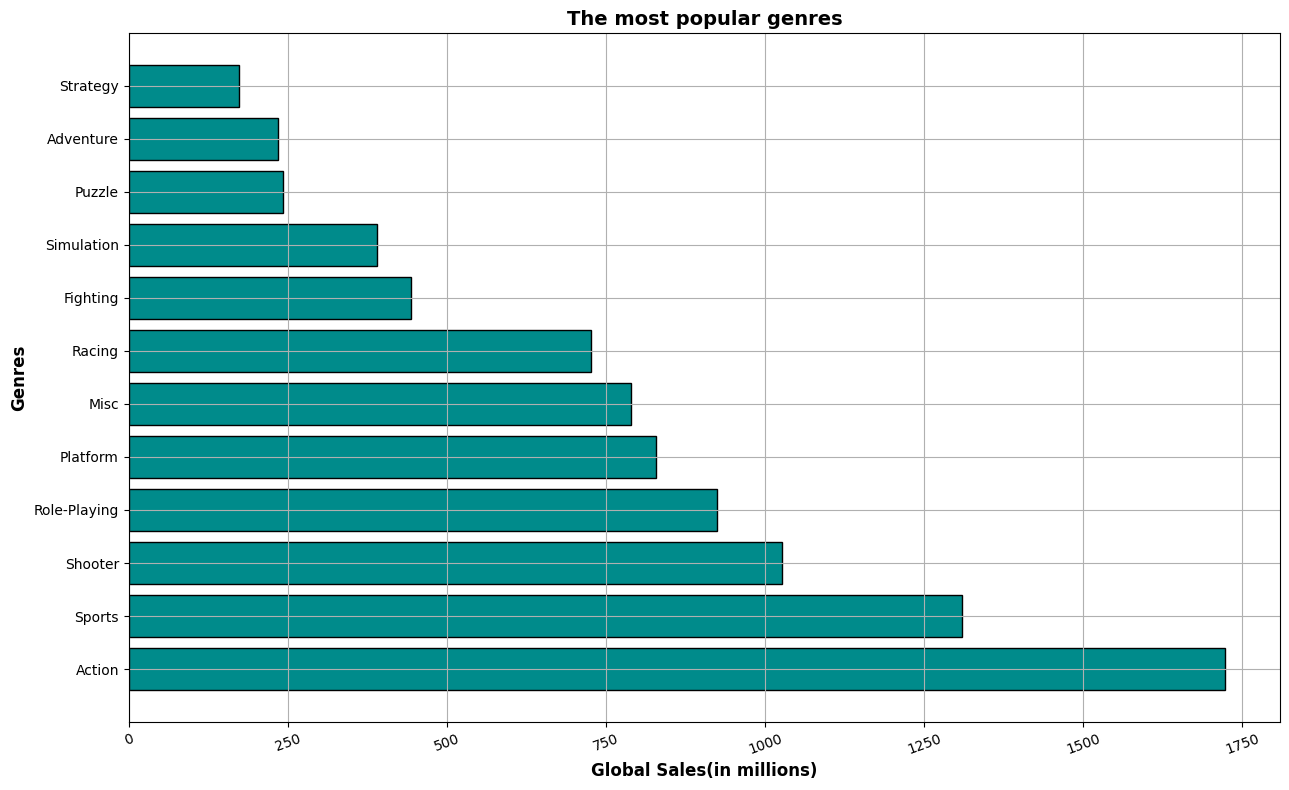

In [25]:
genre_sales_plot = genre_sales.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(13,8))
plt.barh(genre_sales_plot.index , genre_sales_plot.values , edgecolor = 'black' , color = 'darkcyan')
plt.xlabel('Global Sales(in millions)' , fontsize = 12 , fontweight = 'bold')
plt.ylabel('Genres' , fontsize = 12 , fontweight = 'bold')
plt.title('The most popular genres' , fontsize = 14 , fontweight = 'bold')
plt.xticks(rotation=20)
plt.tight_layout()
plt.grid()
plt.show()

# Diagram output
**1. Review**

- The bar chart show the most profitable genres in dataset by global sales.

**2. Conclusion by the diagram**

- The top sellers are the `Action` and `Sports` genres. These two genres are significantly ahead of the others in terms of global sales, which indicates high popularity among a wide audience.

- `Shooter` and `Role-Playing` are also very strong, occupying stable positions among the top genres

- The least popular genres are `Strategy` and `Adventure` , most likely because these are games that require brainpower, and such games are usually less popular. Usually, the greatest demand is for games that allow you to relax and have fun.

- The diagram also shows that after the top 5 genres there is a gradual decrease in interest/profitability, which may indicate stable demand.


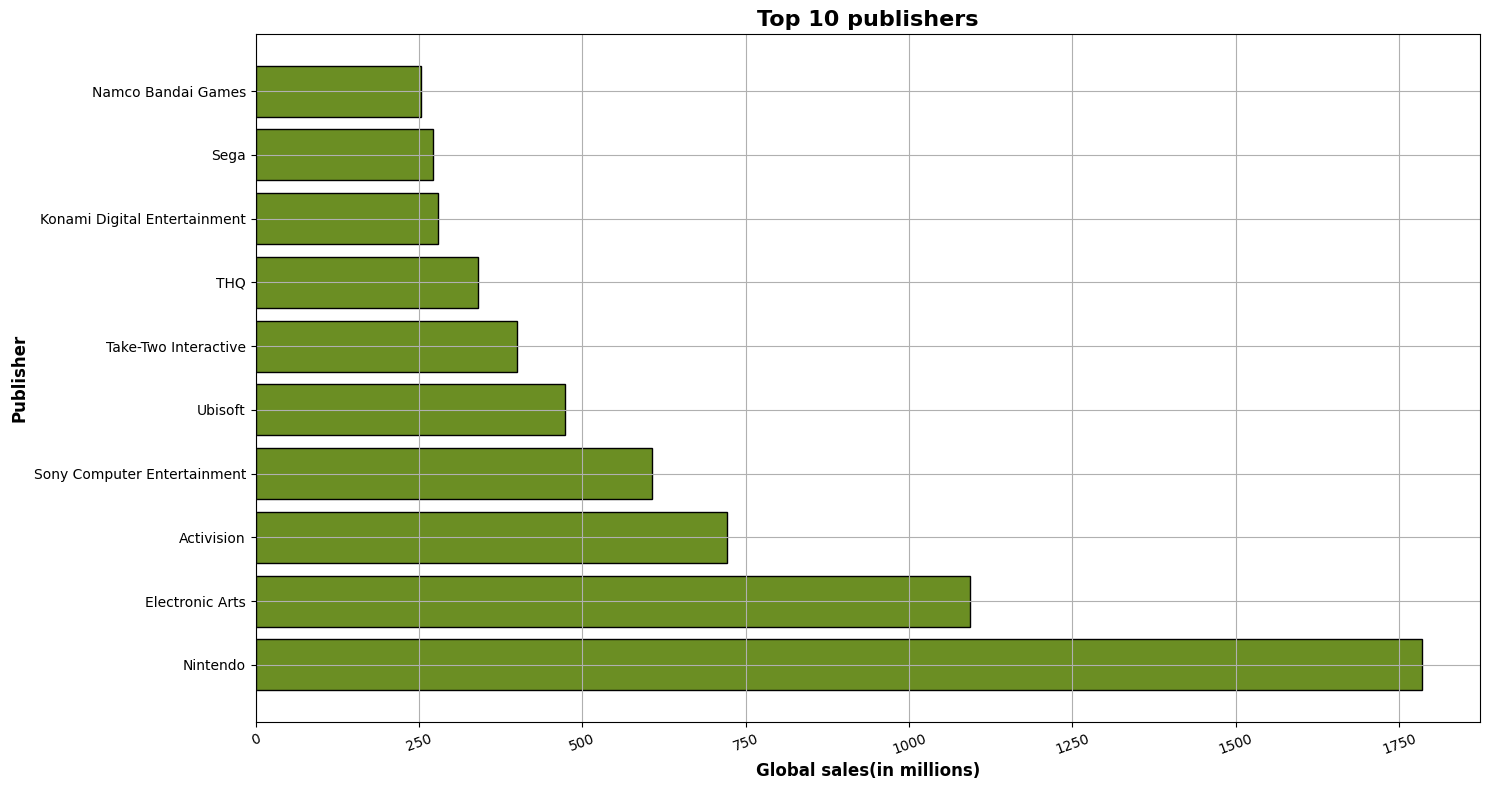

In [26]:
top10_publishers = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10) #For every publisher sum him with Global_Sales then  
plt.figure(figsize=(15,8))
plt.barh(top10_publishers.index , top10_publishers.values , edgecolor = 'black' , color= 'olivedrab')
plt.xlabel('Global sales(in millions)' , fontsize = 12 , fontweight = 'bold')
plt.ylabel('Publisher' , fontsize = 12 , fontweight = 'bold')
plt.title('Top 10 publishers' , fontsize = 16 , fontweight = 'bold')
plt.xticks(rotation=20)
plt.tight_layout()
plt.grid()
plt.show()

# Diagram output
**1. Quick diagram review**
-  `Nintendo` is a clear leader. Its sales significantly exceed other publishers. This speaks to a strong portfolio of games and strong brand loyalty

- `Electronic Arts` and `Activision` are second and third, and are known for their big franchises such as _FIFA, Battlefield, and Call of Duty._

- `Sony Computer Entertainment` is also at a high level, reflecting the popularity of PlayStation exclusives.

-  Publishers `Ubisoft` , `Take-Two Interactive` , `THQ` occupy the middle of the top. They have successful game series like _Assassin’s Creed_ , _GTA_ , _Red Dead Redemption_.

-  The last places in the top are occupied by `Konami` , `Sega`  and `Namco Bandai Games` - they have good positions, but are noticeably inferior to the leaders.

**2. General diagram conclusions**

- The video game market is concentrated in the hands of a few giants.

- `Nintendo` is in a unique position in the market with its own hardware and franchises (_Mario, Zelda, Pokémon_)

-  Also analyze which genres are most common among these top publishers - this will give you even more insight into the market.

<Figure size 1400x800 with 0 Axes>

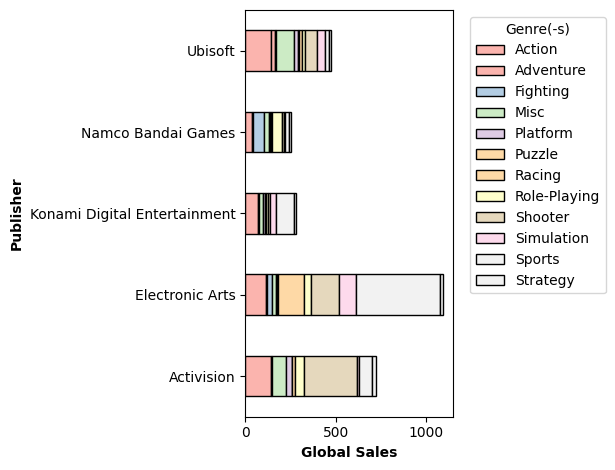

In [27]:
top_publishers = df['Publisher'].value_counts().head(5).index #Creating a varibble which output top 5 publishers in dataset like a list
df_filtered = df[df['Publisher'].isin(top_publishers)] #Filter dataset and only left rows which contain Publisher in top_publishers
genre_publisher_sales = df_filtered.groupby(['Publisher' , 'Genre'])['Global_Sales'].sum().unstack().fillna(0) #Grouping Genre and Publisher column , after grouping Global_Sales will be only outpuut, then use sum() to find sum of Global_Sales for every Genre-Puiblisher pair 
plt.figure(figsize=(14, 8))
genre_publisher_sales.plot(kind='barh', stacked=True, colormap='Pastel1', edgecolor='black')
plt.xlabel('Global Sales' , fontsize = 10 , fontweight = 'bold')
plt.ylabel('Publisher' , fontsize = 10 , fontweight = 'bold')
plt.legend(title='Genre(-s)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Diagram output
**1. Electronic Arts (EA) is the leader in global sales:**

- EA has the largest volume of global sales among all publishers.

- The main contribution is made by the genres: `Sports`, `Simulation`, `Shooter` and `Racing`.

- The large contribution of sports games (series like _FIFA, Madden,_ etc.) is especially noticeable.

**2. Activision is the second in sales:**

- The `Shooter` genre clearly dominates (probably due to the _Call of Duty series_).

- Sale in the `Action` , `Sports` , `Strategy` and `Simulation` genres is also noticeable

**3. Ubisoft balanced strategy:**

-  Sales are spread across many genres, with no one genre clearly dominating.

- `Action` , `Adventure` , `Shooter` , `Platform` , `Misc` and `Role-Playing` are well represented.

**4. Namco Bandai Games — less diverse, but active in niches:**

- The main contribution comes from `Fighting` ,`Role-Playing` and `Platform`.

- This reflects their specialization in the Eastern market (games like _Tekken, Dragon Ball, JRPG_).


**5. Konami Digital Entertainment is the least represented by volume:**

- Sales are relatively modest, but notable in `Sports` , `Simulation` , `Action` and `Fighting` .

- Probably reflects niche franchises like _PES, Metal Gear,_ etc

## General trends:

- The most profitable genres are : `Sports` , `Shooter` , `Action`
  
- Publishers with a narrow specialization (like _Konami_ or _Namco_) are inferior in volume to multi-genre giants (_EA_, _Activision_).

- Ubisoft uses an "all-out" strategy, but falls short of the leaders in scale.


In [28]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


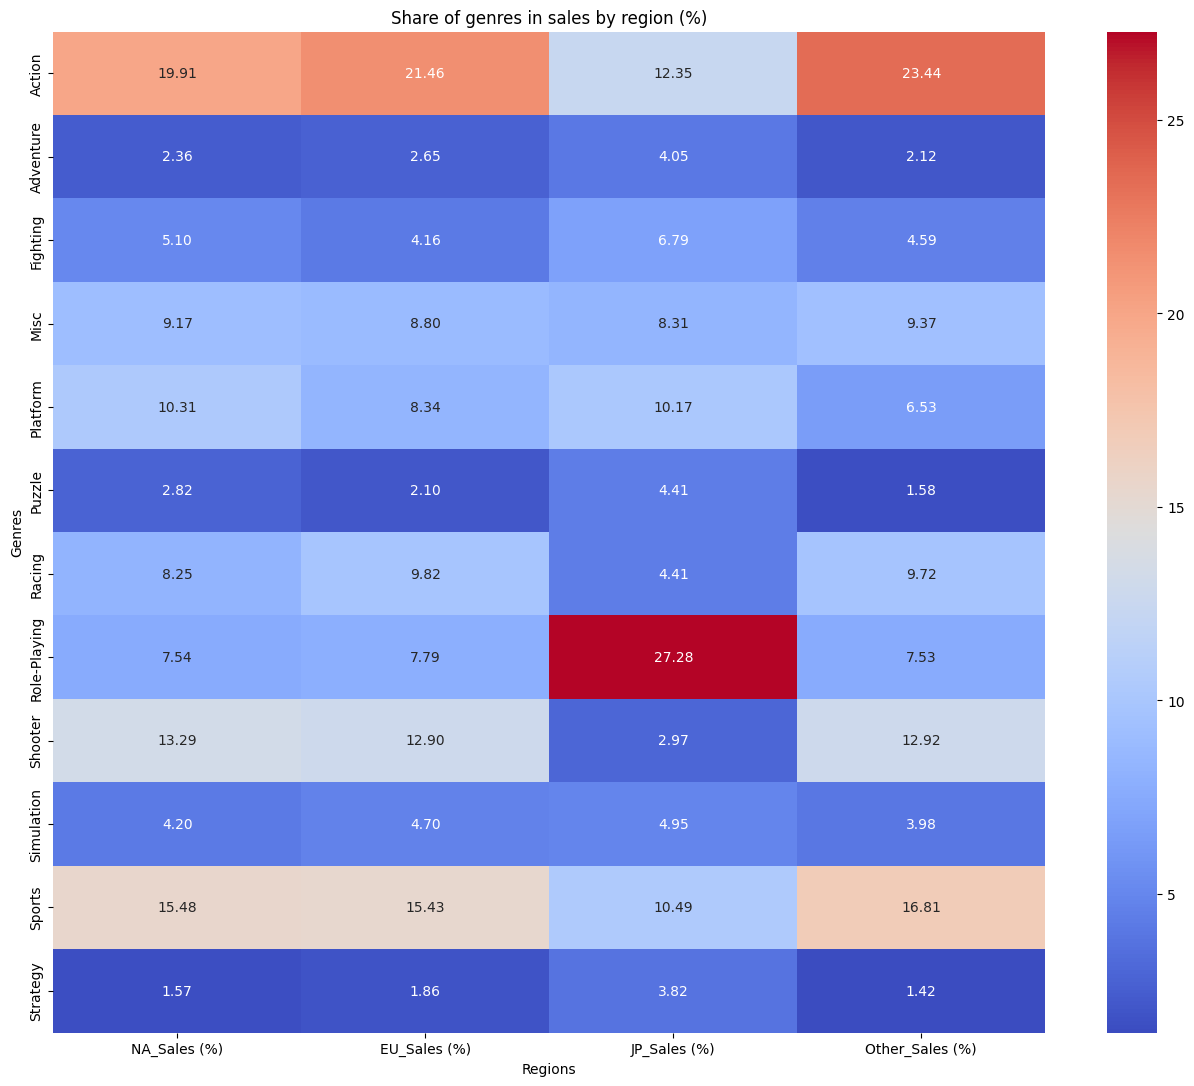

In [33]:

#1st KPI
cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

genre_sales = df.groupby('Genre')[cols].sum()

total_by_region = genre_sales.sum()
genre_share = genre_sales.div(total_by_region)* 100
genre_share = genre_share.round(2)
genre_share = genre_share.rename(columns = {
  
'NA_Sales': 'NA_Sales (%)',
    'EU_Sales': 'EU_Sales (%)',
    'JP_Sales': 'JP_Sales (%)',
    'Other_Sales': 'Other_Sales (%)'

    
})

genre_share = genre_share.reset_index()


heatmap_data = genre_share.set_index('Genre')[['NA_Sales (%)', 'EU_Sales (%)', 'JP_Sales (%)', 'Other_Sales (%)']]
plt.figure(figsize=(16, 13))
sns.heatmap(heatmap_data, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Share of genres in sales by region (%)')
plt.ylabel('Genres')
plt.xlabel('Regions')
plt.show()

# Diagram output

1. **Action:**
- Dominant regions: Europe (21.46%), Other regions (23.44%)
- Special feature: Lowest share in Japan (12.35%)
- Conclusion: Action games show stable demand in all Western markets
2. **Adventure:**
- Even distribution: 2.12% - 4.05% across all regions
- Stability: One of the most consistent genres
- Potential: An undervalued niche with growth opportunities
3. **Fighting:**
- Leader: Japan (6.79%)
- Feature: Traditionally strong genre in the Asian region
- Opportunity: Export of Japanese content to Western markets
4. **Misc:**
- Consistency: 8.31% - 9.37% across all regions
- Stability: Shows steady demand
- Potential: Innovative concepts can find an audience
5. **Platform:**
- Leaders: North America (10.31%), Japan (10.17%)
- Feature: Classic genre with a loyal audience
- Opportunity: Nostalgic content and indie development
6. **Puzzle:**
- Japan dominates: 4.41% vs. 1.58%-2.82% in other regions
- Mobile potential: Ideal for casual platforms
7. **Racing:**
- Even distribution: 4.41% - 9.82% across all regions
- Stability: A stable genre with a loyal audience
8. **Role-Playing**
- CLEAR LEADER IN JAPAN: 27.28% vs. 7.53%-7.79% in other regions
- Cultural feature: Reflects Japanese storytelling traditions
- Huge potential: Exporting JRPGs to global markets
9. **Sports:**
- Dominants: North America (15.48%), Other regions (16.81%)
- Feature: Smallest share in Japan (10.49%)
- Localization: Importance of regional sports preferences
10. **Strategy:**
- Consistency: 1.42% - 3.82% in all regions
- Niche: Stable but small audience


# Business Recommendations
**For companies focused on Japan:**

- RPG Priority: Invest in role-playing games – 27.28% of the market
- Puzzle Development: Leverage the advantage in puzzles (4.41%)
- Fighting Games: Maintain traditionally strong positions

**For Western markets (NA/EU):**

- Action First: Focus on action games for maximum audience
- Sports Dominance: Localized sports content for NA
- Platform Revival: Revival of classic platformers

**Global strategies:**

- Cross-Cultural Export:

  - Japanese RPGs → Western markets
  - Western Action → Japanese market
  - Adapting sports games to regional preferences


- Undervalued niches:

   - Adventure games show growth potential
   - Strategy games can find a specialized audience


**Universal genres:**

- Misc and Racing show stable demand everywhere
- Platform games have a loyal audience

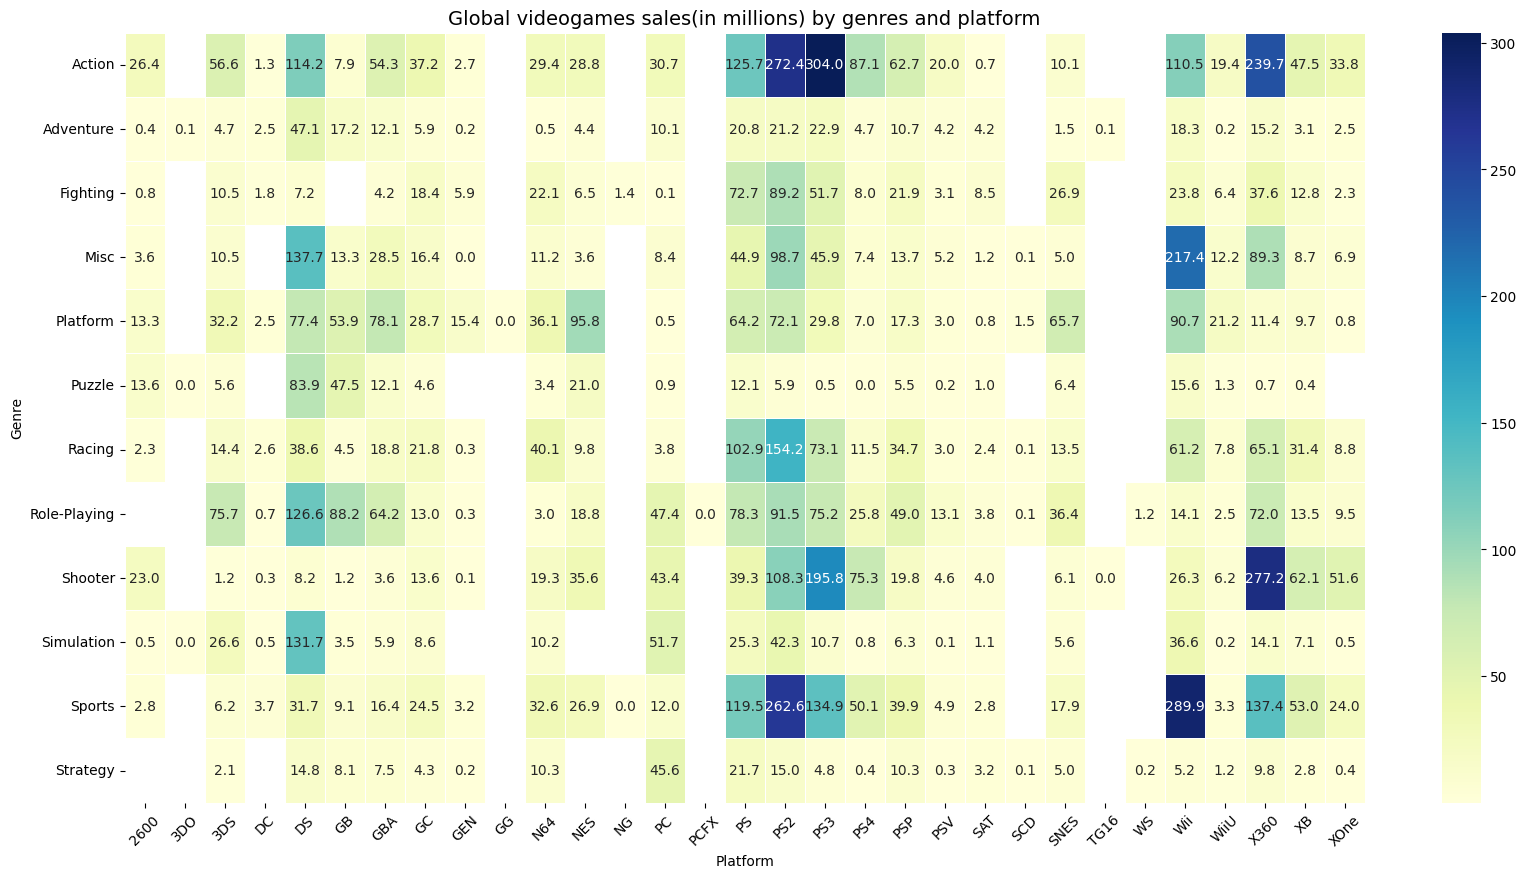

In [30]:
#2nd KPI
platform_genre_sales = (
 df.groupby(['Platform','Genre'])['Global_Sales'].sum().reset_index()

    
)

platform_genre_sales = platform_genre_sales.sort_values(by='Global_Sales' , ascending = False)
platform_genre_sales.reset_index(drop=True, inplace=True)

heatmap_data = platform_genre_sales.pivot(index = 'Genre' , columns = 'Platform' , values= 'Global_Sales')
plt.figure(figsize=(20,10))
sns.heatmap(heatmap_data, cmap = 'YlGnBu' , annot = True ,  fmt=".1f", linewidths=0.5)
plt.title('Global videogames sales(in millions) by genres and platform' , fontsize=14)
plt.xlabel('Platform')
plt.ylabel('Genre')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

# Diagram output

- PS2, Wii, and Xbox 360 were the sales leaders in most genres.

- Sports + PS2, Shooter + Xbox 360, Action + PS3, and Wii + Sports were the most profitable combinations.

- DS and 3DS dominated Puzzle and RPG (especially for the Japanese market).

- Nintendo platforms (Wii, DS) show a strong position for family and casual genres.

**Recommendation for business:**

For the US and Europe: develop Shooter and Sports on modern PlayStation and Xbox equivalents.

For Japan: focus on RPG and Puzzle for portable devices (Switch, mobile).

Understand that there is no universal genre — strategies must be region

<div style="border: 2px solid #333; padding: 15px; border-radius: 10px">
    
# Final conclusions and recommendations
### 1. General trends by genre, platform, and region

1. **Genres:**
- Action and Shooter lead global sales. Sports remains consistently popular thanks to franchises (FIFA, Madden).

2. **Platforms:**
- Nintendo (Wii, DS) dominated the mass market, while Sony and Microsoft focused on the hardcore audience.

3. **Regions:**

- North America — Shooter and Sports lead the way.

- Japan — RPG and platformers are preferred, especially on portable devices.

### 2. Market dynamics by year

- 2005–2010: peak growth driven by new platforms and casual gameplay.

- After 2012: decline due to the transition to digital distribution (not reflected in the dataset).

- Genres experience surges in popularity (e.g., platformers in 2006–2008 due to the Wii).

### 3. Key insights

- Sales peaked in 2008–2010.

- Sales leaders: PS2, Xbox 360, Wii, DS.

- Action, Sports, and Shooter games occupy the largest market share.

- The main market is North America, followed by Europe and Japan.

### 4. Practical recommendations for increasing sales by 10–15%

1. **For developers:**

- Focus on Action, Shooter, and Sports, adapting mechanics to regional preferences (RPG for Japan).

- Make cross-platform versions to cover NA and EU simultaneously.

2. **For publishers:**

- Actively invest in releases when new consoles are launched.

- Develop strong franchises that provide stable income.

3. **For investors:**

- Invest in publishers with diversified genres (Nintendo, EA, Activision).

- Support studios that can quickly adapt to new trends.

</div>

---